In [1]:
# !pip3 install kafka-python==1.4.7 streamz==0.5.2 --user

In [2]:
import os
import sys

SOURCE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
sys.path.insert(0, SOURCE_DIR)

In [3]:
import waterhealer as wh
import json
import logging

logging.basicConfig(level=logging.INFO)
wh.__version__

'0.0.7'

In [4]:
brokers = '10.148.15.246:7095,10.148.15.247:7095'

In [5]:
source = wh.from_kafka(
    ['testing'],
    {
        'bootstrap.servers': brokers,
        'group.id': 'group-test-4',
        'auto.offset.reset': 'latest',
    },
)

In [6]:
def json_loads(row):
    return (row[0], json.loads(row[1]))

def plus(row, m = 30):
    no = row[1]['no']
    if no > m:
        raise Exception(f'{row}, {no} is bigger than {m}')
    return (row[0], no + 1)

In [7]:
outputs = []
h = source.map(json_loads).map(plus).healing(interval = 5)
h.sink(outputs.append)

Output()

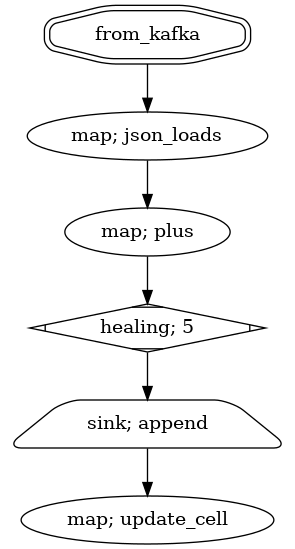

In [8]:
source.visualize()

In [9]:
source.start()

In [10]:
outputs

[]

In [11]:
from kafka import KafkaProducer
from kafka.partitioner import RoundRobinPartitioner

In [12]:
producer = KafkaProducer(
    bootstrap_servers = brokers.split(','),
    api_version = (0, 10),
    partitioner = RoundRobinPartitioner(),
)

INFO:kafka.conn:<BrokerConnection node_id=bootstrap-1 host=10.148.15.246:7095 <connecting> [IPv4 ('10.148.15.246', 7095)]>: connecting to 10.148.15.246:7095 [('10.148.15.246', 7095) IPv4]
INFO:kafka.conn:<BrokerConnection node_id=bootstrap-1 host=10.148.15.246:7095 <connecting> [IPv4 ('10.148.15.246', 7095)]>: Connection complete.


In [13]:
producer.bootstrap_connected()

True

In [14]:
from datetime import datetime
import json

def publish_message(producer_instance, topic_name, key, value):
    try:
        key_bytes = bytes(key, encoding = 'utf-8')
        value_bytes = bytes(value, encoding = 'utf-8')
        x = producer_instance.send(topic_name, value = value_bytes)
        return True
    except Exception as ex:
        print('Exception in publishing message')
        print(str(ex))
        return False

## purposely raise the error

Based on function `plus`, if input bigger than 30, it will throw error.

In [15]:
import time

for count in range(35):
    data = {'no': count, 'datetime': str(datetime.now())}
    print(data)
    publish_message(
        producer, 'testing', 'streaming', json.dumps(data)
    )
    time.sleep(0.1)

INFO:kafka.conn:<BrokerConnection node_id=1 host=10.148.15.247:7095 <connecting> [IPv4 ('10.148.15.247', 7095)]>: connecting to 10.148.15.247:7095 [('10.148.15.247', 7095) IPv4]
INFO:kafka.conn:<BrokerConnection node_id=1 host=10.148.15.247:7095 <connecting> [IPv4 ('10.148.15.247', 7095)]>: Connection complete.
INFO:kafka.conn:<BrokerConnection node_id=bootstrap-1 host=10.148.15.246:7095 <connected> [IPv4 ('10.148.15.246', 7095)]>: Closing connection. 
INFO:kafka.conn:<BrokerConnection node_id=0 host=10.148.15.246:7095 <connecting> [IPv4 ('10.148.15.246', 7095)]>: connecting to 10.148.15.246:7095 [('10.148.15.246', 7095) IPv4]
INFO:kafka.conn:<BrokerConnection node_id=0 host=10.148.15.246:7095 <connecting> [IPv4 ('10.148.15.246', 7095)]>: Connection complete.


{'no': 0, 'datetime': '2021-10-23 16:45:50.892070'}
{'no': 1, 'datetime': '2021-10-23 16:45:50.994130'}
{'no': 2, 'datetime': '2021-10-23 16:45:51.096417'}
{'no': 3, 'datetime': '2021-10-23 16:45:51.196906'}
{'no': 4, 'datetime': '2021-10-23 16:45:51.297508'}
{'no': 5, 'datetime': '2021-10-23 16:45:51.398128'}
{'no': 6, 'datetime': '2021-10-23 16:45:51.498789'}
{'no': 7, 'datetime': '2021-10-23 16:45:51.599490'}
{'no': 8, 'datetime': '2021-10-23 16:45:51.700196'}
{'no': 9, 'datetime': '2021-10-23 16:45:51.800901'}
{'no': 10, 'datetime': '2021-10-23 16:45:51.901592'}
{'no': 11, 'datetime': '2021-10-23 16:45:52.002199'}
{'no': 12, 'datetime': '2021-10-23 16:45:52.102817'}
{'no': 13, 'datetime': '2021-10-23 16:45:52.203475'}
{'no': 14, 'datetime': '2021-10-23 16:45:52.304085'}
{'no': 15, 'datetime': '2021-10-23 16:45:52.404747'}
{'no': 16, 'datetime': '2021-10-23 16:45:52.505393'}
{'no': 17, 'datetime': '2021-10-23 16:45:52.606697'}
{'no': 18, 'datetime': '2021-10-23 16:45:52.707291'}
{'n

ERROR:waterhealer.core:({'partition': 1, 'offset': 63, 'topic': 'testing'}, {'no': 31, 'datetime': '2021-10-23 16:45:54.016123'}), 31 is bigger than 30
Traceback (most recent call last):
  File "/home/jovyan/water-healer/waterhealer/core.py", line 762, in update
    result = self.func(x, *self.args, **self.kwargs)
  File "<ipython-input-6-a7d3a931c4a5>", line 7, in plus
    raise Exception(f'{row}, {no} is bigger than {m}')
Exception: ({'partition': 1, 'offset': 63, 'topic': 'testing'}, {'no': 31, 'datetime': '2021-10-23 16:45:54.016123'}), 31 is bigger than 30
tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <zmq.eventloop.ioloop.ZMQIOLoop object at 0x7f91f9afe990>>, <Future finished exception=Exception("({'partition': 1, 'offset': 63, 'topic': 'testing'}, {'no': 31, 'datetime': '2021-10-23 16:45:54.016123'}), 31 is bigger than 30")>)
Traceback (most recent call last):
  File "/home/jovyan/.local/lib/python3.7/site-pa

{'no': 32, 'datetime': '2021-10-23 16:45:54.116763'}
{'no': 33, 'datetime': '2021-10-23 16:45:54.217381'}
{'no': 34, 'datetime': '2021-10-23 16:45:54.317981'}


In [17]:
offsets = source.consumer.committed(source.consumer.assignment())
lags = {}
for offset in offsets:
    _, high_offset = source.consumer.get_watermark_offsets(offset)
    lags[offset.partition] = high_offset - offset.offset
lags

{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [19]:
sum(lags.values()) == 4

True